In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В этом блокноте мы рассмотрим простейший пример использования модели Хольта-Винтерса.

In [2]:
df = pd.read_excel('/content/sample_data/TimeSeries Forecast.xlsx',index_col = 'x')
df

,Y1,Y2
x,,
1,0.029540,1.027412
2,0.074254,1.963969
3,0.088620,2.727720
4,0.148507,3.253638
5,0.147699,3.499999
...,...,...
96,3.563279,6.758294
97,2.866289,7.294760
98,3.637476,8.066855


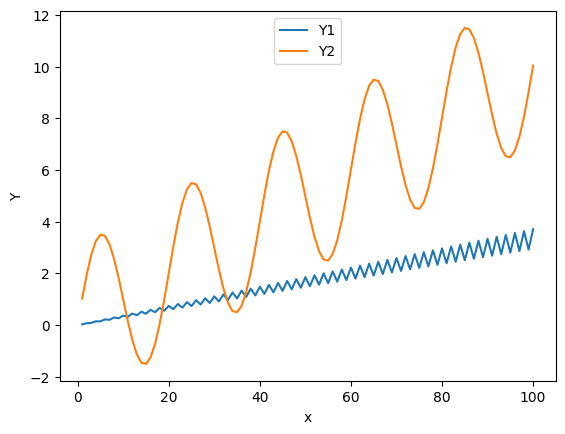

In [3]:
plt.figure()
plt.plot(df.index, df['Y1'], label = 'Y1')
plt.plot(df.index, df['Y2'], label = 'Y2')
#plt.plot(df.index, df['Y2'])
plt.xlabel('x')
plt.ylabel('Y')
plt.legend(loc='upper center')
plt.show()

In [4]:
df1 = df.loc[94:101].drop(columns='Y2')
df2 = df.loc[36:101].drop(columns='Y1')

сезонность p

период прогноза h

#Аддитивная модель

Y^[t+h] = a[t] + h * b[t] + s[t - p + 1 + (h - 1) mod p],

a[t] = α (Y[t] - s[t-p]) + (1-α) (a[t-1] + b[t-1]) - сглаживание

b[t] = β (a[t] - a[t-1]) + (1-β) b[t-1] - тренд

s[t] = γ (Y[t] - a[t]) + (1-γ) s[t-p] - сезонность

α, β, γ параметры (0,1).

#Мультипликативная модель

Y^[t+h] = (a[t] + h * b[t]) * s[t - p + 1 + (h - 1) mod p],

a[t] = α (Y[t] / s[t-p]) + (1-α) (a[t-1] + b[t-1]) - сглаживание

b[t] = β (a[t] - a[t-1]) + (1-β) b[t-1] - тренд

s[t] = γ (Y[t] / a[t]) + (1-γ) s[t-p] - сезонность

α, β, γ параметры (0,1).


In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Выполним декомпозицию (выделим тренд, сезонность и шум):

In [6]:
decompose_result = seasonal_decompose(df1['Y1'], model='additive', period=2)

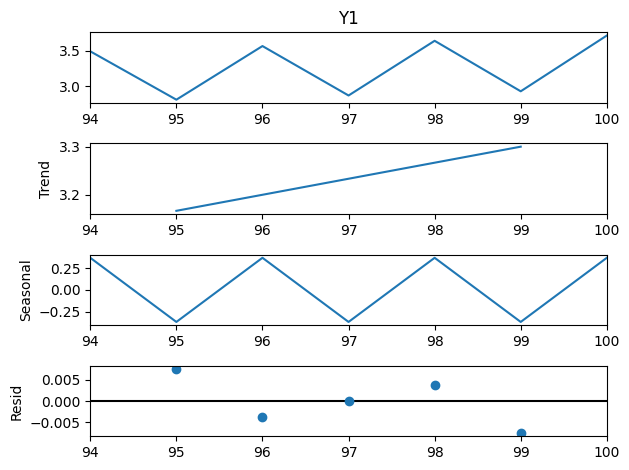

In [7]:
decompose_result.plot()
plt.show()

In [8]:
fit1 = ExponentialSmoothing(df1['Y1'],trend='add',seasonal='add',seasonal_periods=2).fit()
fit2 = ExponentialSmoothing(df2['Y2'],trend='add',seasonal='add',seasonal_periods=20).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
results = pd.DataFrame(index=[r"$\alpha$", r"$\beta$", r"$\gamma$"])

In [10]:
params = [
    "smoothing_level",
    "smoothing_trend",
    "smoothing_seasonal"
]
results["Y1"] = [fit1.params[p] for p in params]
results["Y2"] = [fit2.params[p] for p in params]
results

,Y1,Y2
$\alpha$,0.216640,0.994120
$\beta$,0.000092,0.020730
$\gamma$,0.783360,0.000118


In [11]:
df['estimated Y1'] = fit1.fittedvalues
df['estimated Y2'] = fit2.fittedvalues
df

,Y1,Y2,estimated Y1,estimated Y2
x,,,,
1,0.029540,1.027412,NaN,NaN
2,0.074254,1.963969,NaN,NaN
3,0.088620,2.727720,NaN,NaN
4,0.148507,3.253638,NaN,NaN
5,0.147699,3.499999,NaN,NaN
...,...,...,...,...
96,3.563279,6.758294,3.558295,6.755854
97,2.866289,7.294760,2.877079,7.291357
98,3.637476,8.066855,3.629787,8.064355


In [14]:
df_prediction = pd.DataFrame(list(zip(list(fit1.forecast(20)),list(fit2.forecast(20)))), index =list(range(101,121)),
                                              columns =['Y1','Y2'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
df_prediction

,Y1,Y2
101,2.995965,11.064146
102,3.774395,11.997263
103,3.064810,12.756055
104,3.843241,13.275747
105,3.133655,13.515115
106,3.912086,13.460760
107,3.202501,13.127663
108,3.980931,12.558310
109,3.271346,11.818106
110,4.049777,10.989618


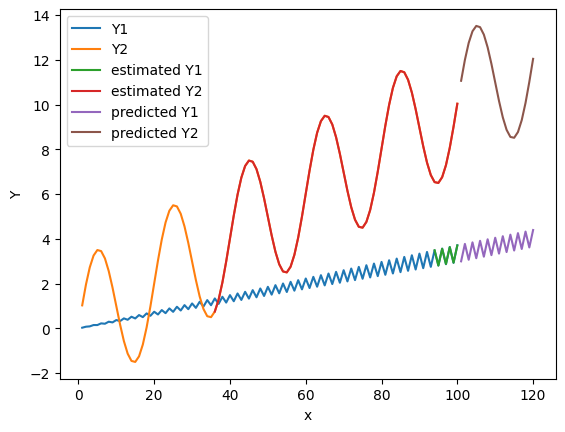

In [13]:
plt.figure()
plt.plot(df.index, df['Y1'], label = 'Y1')
plt.plot(df.index, df['Y2'], label = 'Y2')

plt.plot(df.index, df['estimated Y1'], label = 'estimated Y1')
plt.plot(df.index, df['estimated Y2'], label = 'estimated Y2')
plt.plot(df_prediction.index, df_prediction['Y1'], label = 'predicted Y1')
plt.plot(df_prediction.index, df_prediction['Y2'], label = 'predicted Y2')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()